# Relationship between Features and Target

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [17]:
DATA_DIR = "../original_data"
TRAIN_VALUES_FILE = os.path.join(DATA_DIR, "train_values.csv")
TRAIN_LABELS_FILE = os.path.join(DATA_DIR, "train_labels.csv")

sns.set_theme(style="whitegrid")

In [18]:
train_features_df = pd.read_csv(TRAIN_VALUES_FILE)

In [19]:
train_features_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_labels_df = pd.read_csv(TRAIN_LABELS_FILE)

In [21]:
train_labels_df

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [22]:
full_df = pd.merge(train_features_df,train_labels_df, on = 'building_id')
full_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [24]:
corr_matrix_df = full_df[['count_floors_pre_eq', "age", "area_percentage", "height_percentage", "count_families", "damage_grade"]]

In [37]:
corr_matrix_df.corr(method = 'spearman').round(3)

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,damage_grade
count_floors_pre_eq,1.000,0.255,0.125,0.755,0.078,0.142
age,0.255,1.000,-0.017,0.197,0.047,0.173
area_percentage,0.125,-0.017,1.000,0.210,0.078,-0.100
height_percentage,0.755,0.197,0.210,1.000,0.063,0.080
count_families,0.078,0.047,0.078,0.063,1.000,0.061
damage_grade,0.142,0.173,-0.100,0.080,0.061,1.000


Correlation matrix between quantitative variables. We can see that the number of floors of the building is strongly correlated with the height of the building which is expected and these two variables can be considered redundant. Age of the building is weakly correlated to number of floors and height of the building and the area of the building is also weakly correlated with the height of the building. We see that the number of floors and the age of the building are weakly positively correlated to our target variable "damage_grade". The rest of the variables are not significantly correlated to our target variable 

In [25]:
import scipy.stats as scs

In [26]:
categorical_incl_binary_df =  full_df.loc[:, "land_surface_condition" : "has_secondary_use_other"]

In [27]:
categorical_incl_binary_df

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,t,r,n,f,q,t,d,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,o,r,n,x,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,t,r,n,f,x,t,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,t,r,n,f,x,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,t,r,n,f,x,s,d,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,n,r,n,f,j,s,q,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260597,t,r,n,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260598,t,r,q,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260599,t,r,x,v,s,j,d,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = pd.DataFrame(index = categorical_incl_binary_df.columns)
for feature in categorical_incl_binary_df.columns:
    p_values = []
    for second_feature in categorical_incl_binary_df.columns:
        crosstab = pd.crosstab(categorical_incl_binary_df[feature], categorical_incl_binary_df[second_feature])
        chi2_values = scs.chi2_contingency(crosstab)
        p_values.append(chi2_values[1])
    
    
    df[feature] = p_values  

In [29]:
def p_small_red_background(cell_value):

    highlight = 'background-color: red;'
    default = ''
    if cell_value < 0.05:
        return highlight
    return default

In [36]:
colored_df = df.round(3).style.applymap(p_small_red_background)
colored_df

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
land_surface_condition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.000000,0.000000,0.042000,0.051000,0.435000,0.747000,0.527000,0.270000,0.000000
foundation_type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
roof_type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ground_floor_type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009000,0.000000
other_floor_type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024000,0.000000
position,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.669000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.812000,0.000000
plan_configuration,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079000,0.477000,1.000000,0.000000,0.826000
has_superstructure_adobe_mud,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047000,0.000000,0.049000,0.038000,0.304000,0.427000,0.153000,0.286000,0.693000,0.000000
has_superstructure_mud_mortar_stone,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139000,0.004000
has_superstructure_stone_flag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384000,0.000000,0.000000,0.000000,0.749000,0.680000,0.046000,0.354000,0.287000,1.000000,0.312000


In this table matrix we inspect with the chi square independence test whether the categorical variables are dependent to each other. If the cell in the table is colored in red it means that the independecy test for respective row and column name is rejected and they are dependent to each other.  

In [31]:
test_statistics = {}
p_values = {}
for feature in categorical_incl_binary_df.columns:
    contigency_tab = pd.crosstab(full_df[feature], full_df['damage_grade'])
    chi2_values = scs.chi2_contingency(contigency_tab)
    
    test_statistics[feature] = chi2_values[0]
    p_values[feature] = chi2_values[1]
    
target_indendence_df = pd.DataFrame({'test_statistic' : test_statistics, 'p_value' : p_values})
target_indendence_df.round(3)

,test_statistic,p_value
land_surface_condition,449.671,0.000
foundation_type,48547.161,0.000
roof_type,30251.419,0.000
ground_floor_type,36430.849,0.000
other_floor_type,31487.392,0.000
position,1079.927,0.000
plan_configuration,1734.117,0.000
has_superstructure_adobe_mud,1470.498,0.000
has_superstructure_mud_mortar_stone,29276.035,0.000
has_superstructure_stone_flag,1147.811,0.000


In this chi squared independence tests conducted between the target variable damage_grade and every other categorical feature we can reject the independency hypothesis for every feature except for "has_secondary_use_use_police" which has a very high p-value (0.452). 

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:
from feature_engine.encoding import OrdinalEncoder

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
encoder = OrdinalEncoder(encoding_method= "arbitrary",
                         variables= ["land_surface_condition", "foundation_type", "roof_type", "ground_floor_type",
                                     "other_floor_type", "position", "plan_configuration", "legal_ownership_status"])

encoded_df = encoder.fit_transform(full_df.drop(columns=["building_id", "damage_grade"]))

In [ ]:
mutual_info = mutual_info_classif(X = encoded_df, y = full_df["damage_grade"], discrete_features= True)


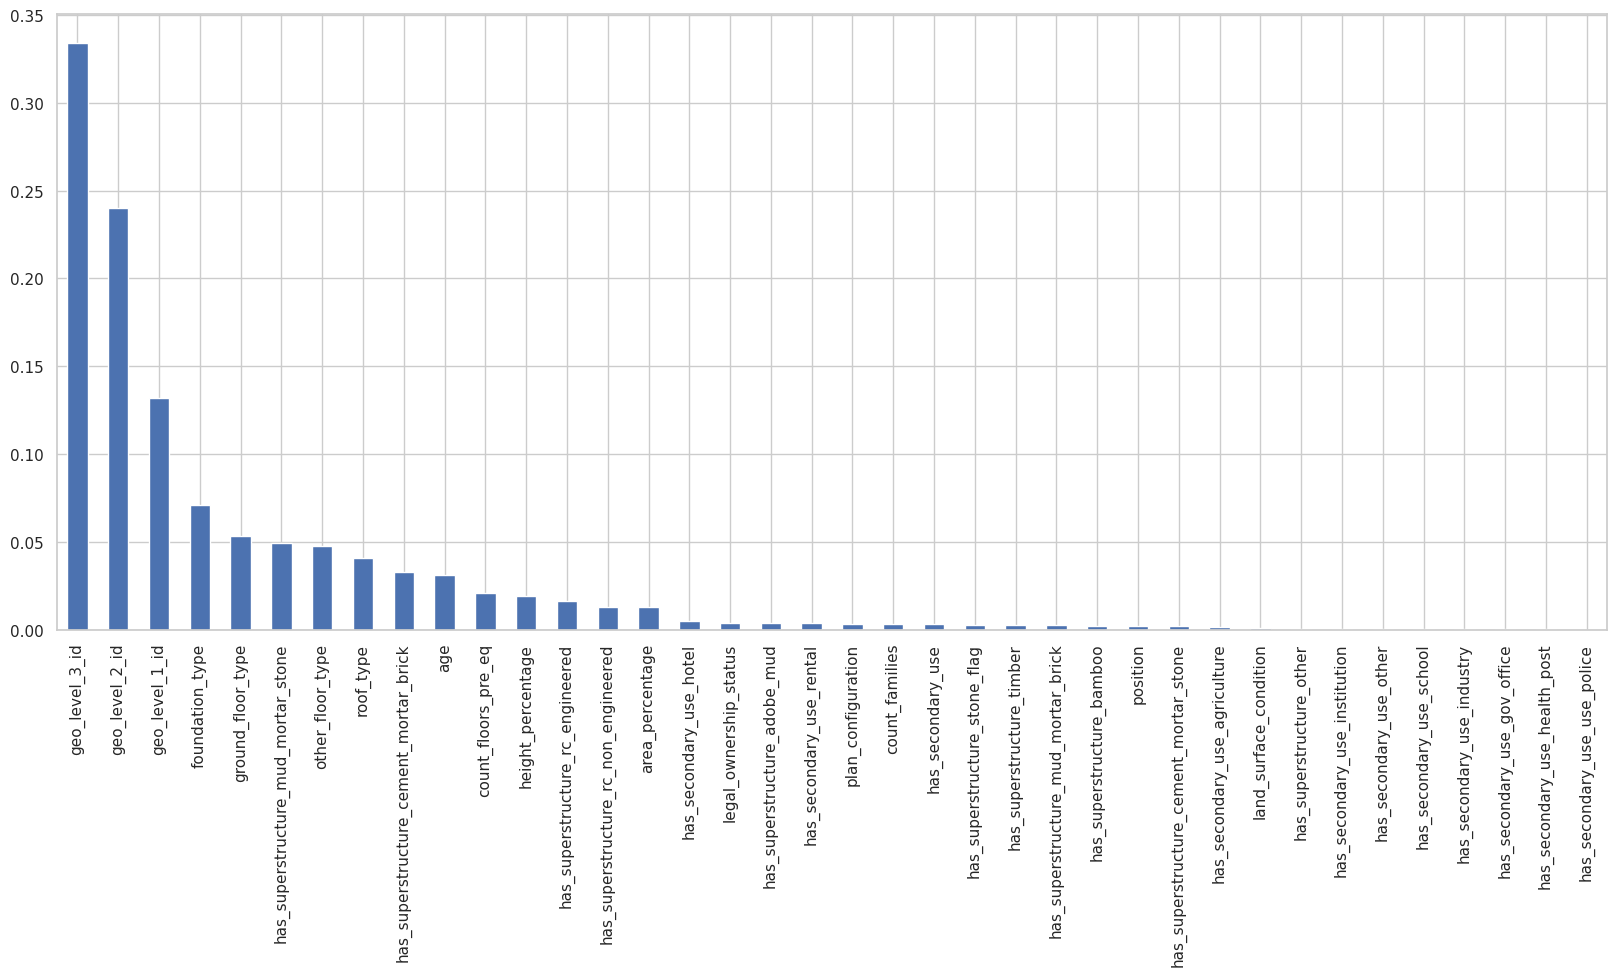

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = encoded_df.columns
mutual_info.sort_values(ascending= False).plot.bar(figsize = (20,8))

plt.show()

I have calculated the Mutual information between the features and the target variable and the three features with 
the highest mutual information with damage_grade (with considerable difference from rest of the features) are geo_level_3_id, geo_level_2_id and  geo_level_1_id., features that specify the geographic location of the building damaged by earthquake. I'd assume that buildings close to each other experienced a similar magnitude of the earthquake and therefore the damage was also similar. The three geo features are followed by foundation_type, ground_floor_type and has_superstructure_mud_mortar_brick

In [ ]:
categorial_var_df = full_df.loc[:, "land_surface_condition" : "plan_configuration"]
full_categorical_var_df = pd.concat([categorial_var_df, full_df["legal_ownership_status"]], axis = 'columns')

In [ ]:
def group_distribution(feature_name, target_name):
    df_to_concat = []
    for target_value in np.sort(full_df[target_name].unique()):
        ser_value_counts = full_df[full_df[target_name] == target_value][feature_name].value_counts()
        ser_value_counts.name = target_value
        df_to_concat.append(ser_value_counts)
        
    return pd.concat(df_to_concat, axis= "columns").transpose()

In [ ]:
def normalize_df(df):
    for row in df.index:
        row_sum = df.loc[row].sum()
        for col in df.columns:
            df.at[row,col] = df.at[row,col]/row_sum
    return df    

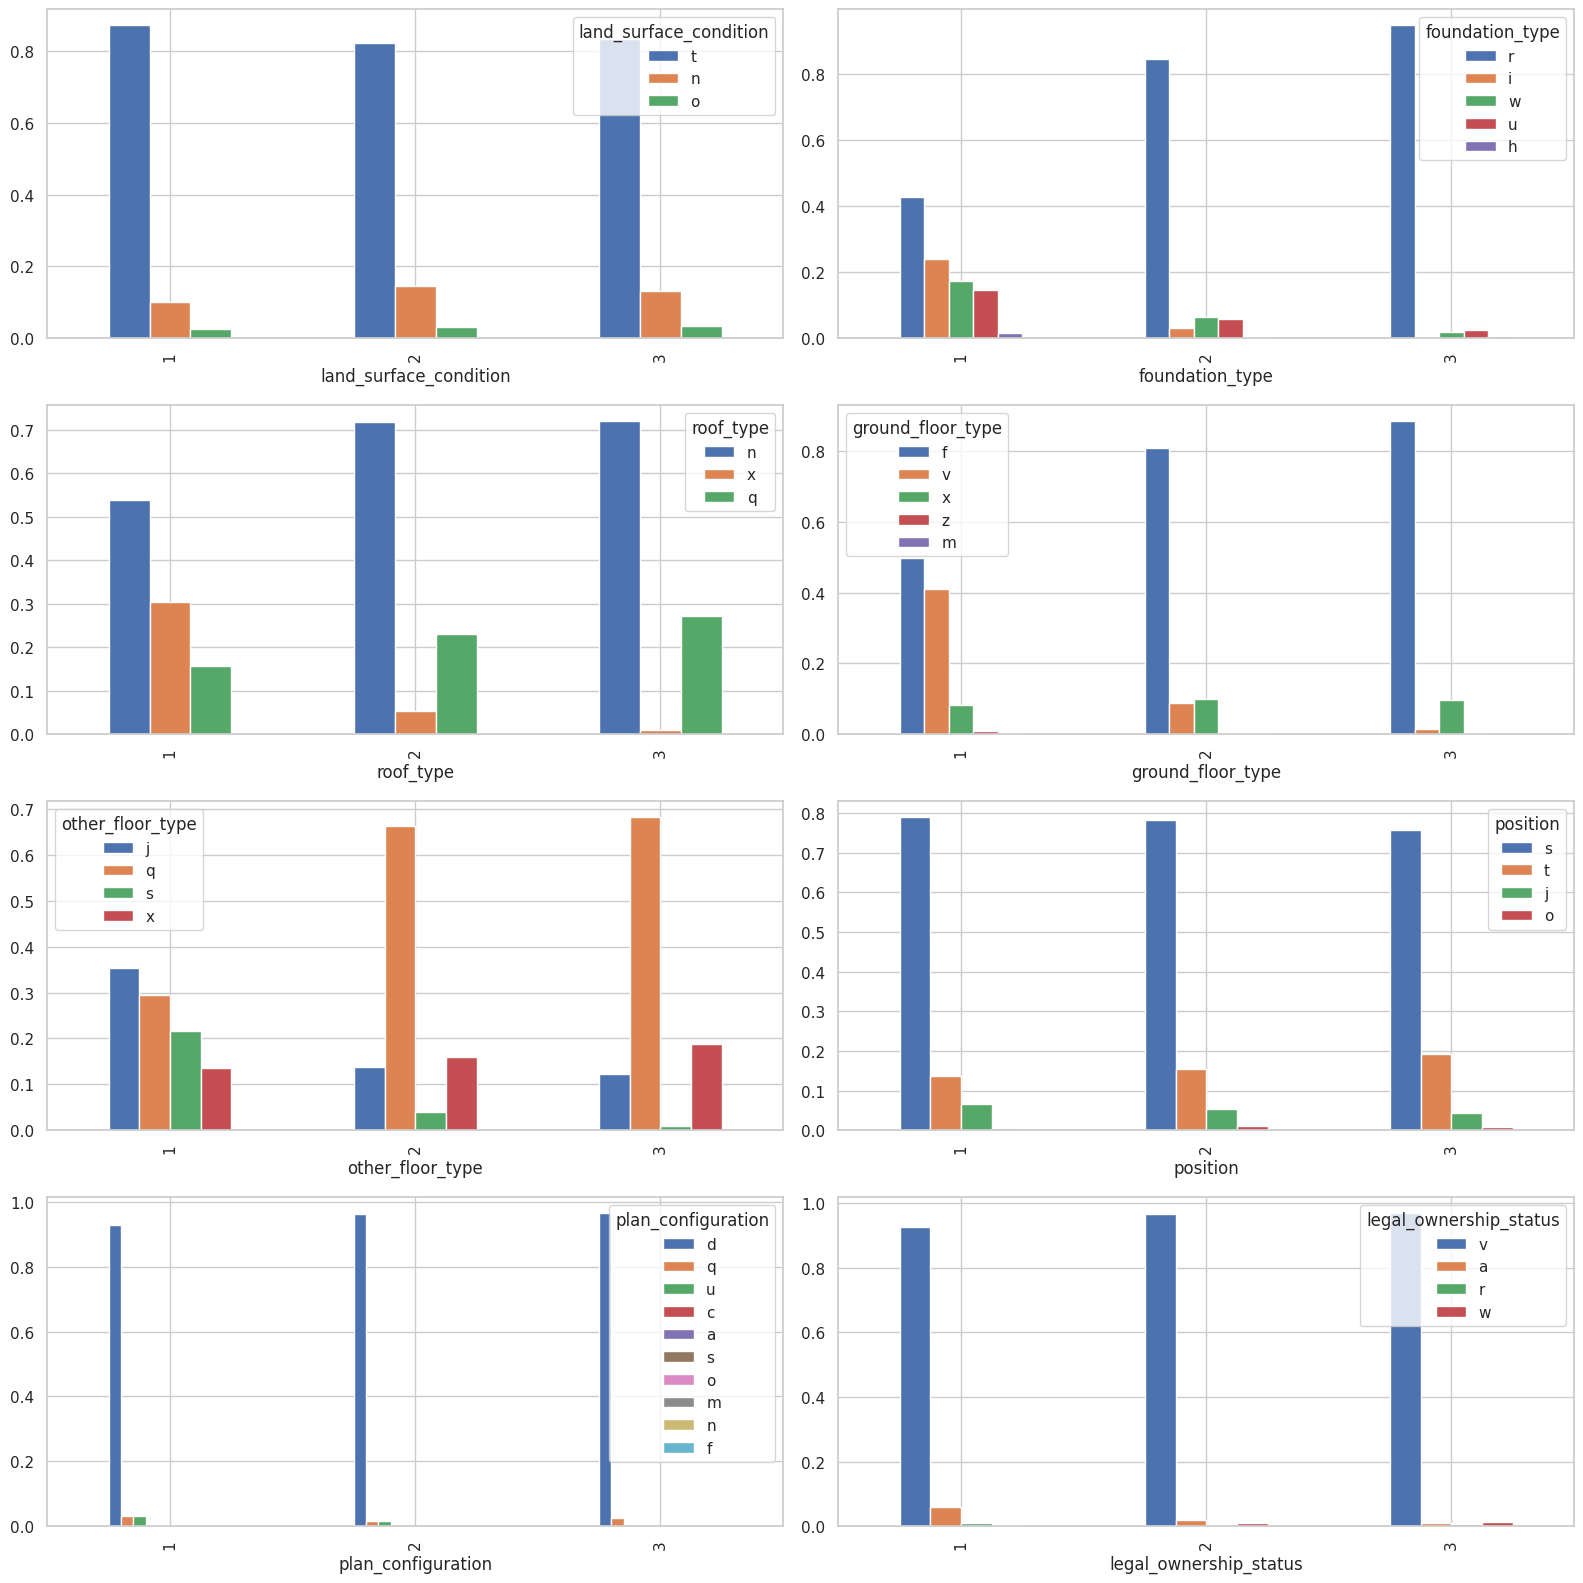

In [ ]:
fig,axs = plt.subplots(ncols= 2, nrows = 4, figsize = (16,16))
axs = axs.flatten()

for idx, col in enumerate(full_categorical_var_df.columns):
    df = group_distribution(col, "damage_grade")
    df = normalize_df(df)
    df.plot.bar(ax = axs[idx])
    axs[idx].set_xlabel(col)
 #   axs[idx].set_ylabel('Frequency')
plt.tight_layout()   
plt.show()

Here we can see the distribution of the different values of the categorical attributes given a specific damage_grade. We can see that  r value occurrence in foundation_type is significantly greater when the damage grade to the building is 2 or 3 as opposed to 1. u,w and i occurrence is significantly higher when the damage grade to building is 1 as opposed to 2 or 3. Regarding ground floor type the occurrence of f is higher in the buildings with damage grade 2 or 3 but the occurence of v is lower in comparison to buildings with damage grade equal to 1. Regarding other_floor_type the occurrence of q is siginficantly higher in buildings with damage level 2 or 3 as opposed to buildings with damage level 1. The occurrence of j and s is opposed to q significantly higher in buildings with damage grade 1 than those with damage grade 2 or 3. Regarding roof_type the n  and q occurrence  is higher in the buildings with damage grade 2 or 3 as opposed to 1.On the other hand the  occurrence of x seems to be higher in buildings with damage grade 1 and lower in buildings with damage grade 2 and 3. Land_surface_condition values seem to have the same distribution in every damage grade. This also applies to position variable. 

In [ ]:
has_superstructure_df = categorical_incl_binary_df.loc[:,"has_superstructure_adobe_mud":"has_superstructure_other"]
has_superstructure_df = pd.concat([has_superstructure_df,full_df["damage_grade"]], axis = "columns")
has_superstructure_df

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,1,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,1,1,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0,1,0,0,0,0,0,0,0,0,0,2
260597,0,1,0,0,0,0,0,0,0,0,0,3
260598,0,1,0,0,0,0,0,0,0,0,0,3
260599,0,0,0,0,0,1,0,0,0,0,0,2


In [ ]:
series_to_concat = []
for col in has_superstructure_df.drop("damage_grade", axis = 1).columns:
    ser = has_superstructure_df[has_superstructure_df[col] == 1]["damage_grade"].value_counts().sort_index()
    ser.name =  col[19:] #cutting has_superstructure
    series_to_concat.append(ser)

super_structure_distr_df = pd.concat(series_to_concat, axis = "columns")
super_structure_distr_df = super_structure_distr_df.transpose()

In [ ]:
super_structure_distr_df

damage_grade,1,2,3
adobe_mud,594,13902,8605
mud_mortar_stone,8760,113947,75854
stone_flag,182,4534,4231
cement_mortar_stone,829,3248,675
mud_mortar_brick,623,11698,5440
cement_mortar_brick,7105,11421,1089
timber,7642,40187,18621
bamboo,2839,14001,5314
rc_non_engineered,3857,5832,1410
rc_engineered,2656,1402,75


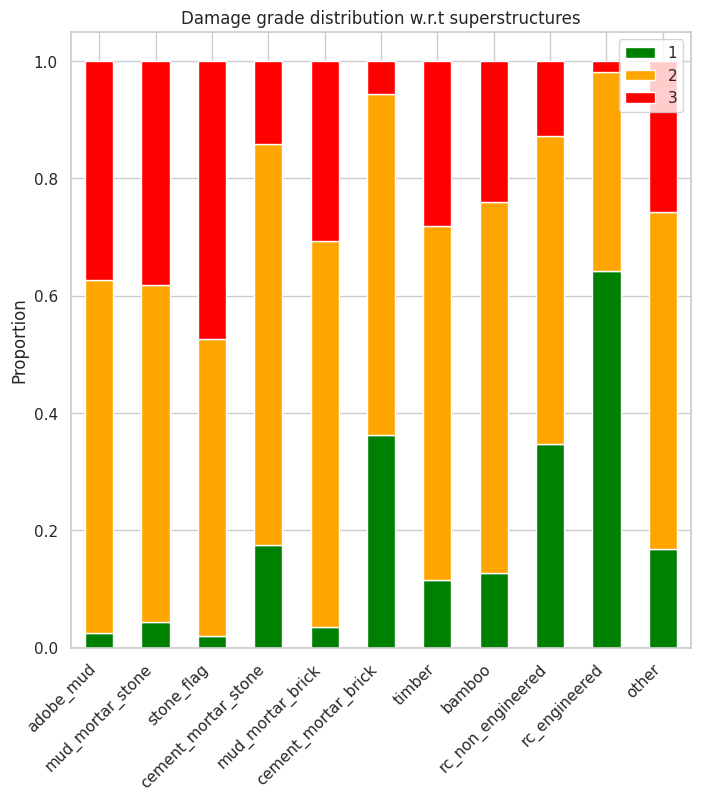

In [ ]:
super_structure_distr_df = normalize_df(super_structure_distr_df)
super_structure_distr_df.plot.bar(stacked = True, figsize = (8,8), color = ["green","orange", "red"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion")
plt.title("Damage grade distribution w.r.t superstructures")
plt.legend(loc = "upper right")
plt.show()

We can see that rc_engineered superstructures seem to be resistant to the earthquake since a high percentage of them (over 60%)
are assigned a 1 damage grade level. More than half of buildings for every other superstructure than rc_engineered experience a damage grade level higher than 1 from the earthquake. Buildings made with stone seem to experience higher damage

In [ ]:
secondary_usage_df = categorical_incl_binary_df.loc[:,"has_secondary_use_agriculture":"has_secondary_use_other"]
secondary_usage_df = pd.concat([secondary_usage_df,full_df["damage_grade"]], axis = "columns")
secondary_usage_df

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,2
260597,0,0,0,0,0,0,0,0,0,0,3
260598,0,0,0,0,0,0,0,0,0,0,3
260599,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
to_concat = []
for col in secondary_usage_df.drop("damage_grade", axis = 1).columns:
    ser = secondary_usage_df[secondary_usage_df[col] == 1]["damage_grade"].value_counts().sort_index()
    ser.name =  col[18:] #cutting has_secondary_use_
    to_concat.append(ser)

secondary_use_distr_df = pd.concat(to_concat, axis = "columns")
secondary_use_distr_df =secondary_use_distr_df.transpose()
secondary_use_distr_df

damage_grade,1,2,3
agriculture,829,10679,5269
hotel,2216,5058,1489
rental,877,1051,183
institution,99,129,17
school,30,47,17
industry,59,152,68
health_post,12,32,5
gov_office,13,21,4
use_police,4,12,7
other,175,852,307


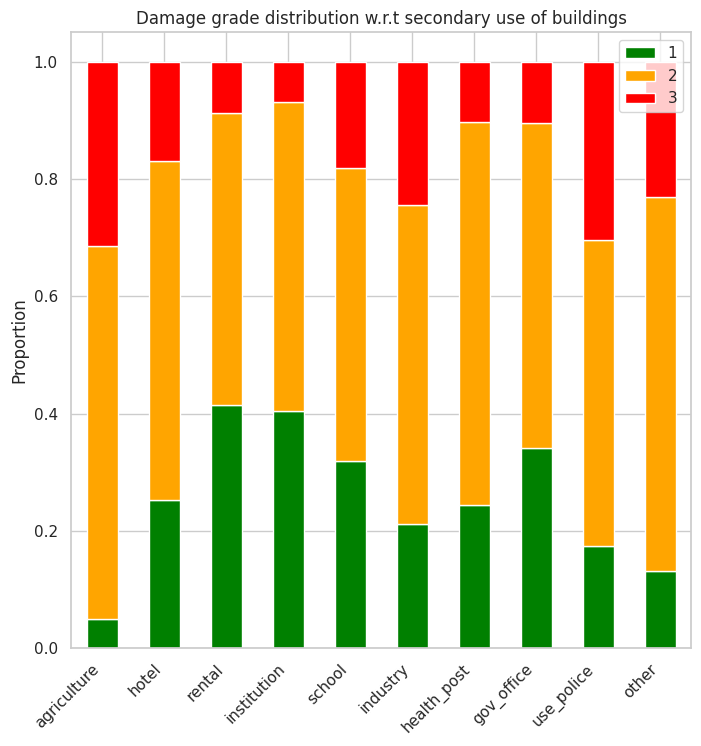

In [ ]:
secondary_use_distr_df = normalize_df(secondary_use_distr_df)
secondary_use_distr_df.plot.bar(stacked = True, figsize = (8,8), color = ["green","orange", "red"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion")
plt.title("Damage grade distribution w.r.t secondary use of buildings")
plt.legend(loc = "upper right")
plt.show()

Although more than half of the buildings used secondarily as rental or as institutions have experienced higher than 1 damage grade from the earthquake, they are less severely damaged than buildings use for other purposes. Buildings used for agriculture seem to experience more severe damage than buildings used for other purposes.

In [ ]:
geo_level_1_distr_df = group_distribution("geo_level_1_id", "damage_grade").transpose()
geo_level_1_distr_df = normalize_df(geo_level_1_distr_df)
geo_level_1_distr_df = geo_level_1_distr_df.sort_index()
geo_level_1_distr_df

,1,2,3
geo_level_1_id,,,
0,0.084019,0.766642,0.149339
1,0.152166,0.734913,0.112921
2,0.091300,0.655209,0.253491
3,0.032493,0.603448,0.364058
4,0.035763,0.766337,0.197900
5,0.165799,0.748699,0.085502
6,0.086461,0.665354,0.248185
7,0.054386,0.593503,0.352111
8,0.034277,0.446174,0.519549


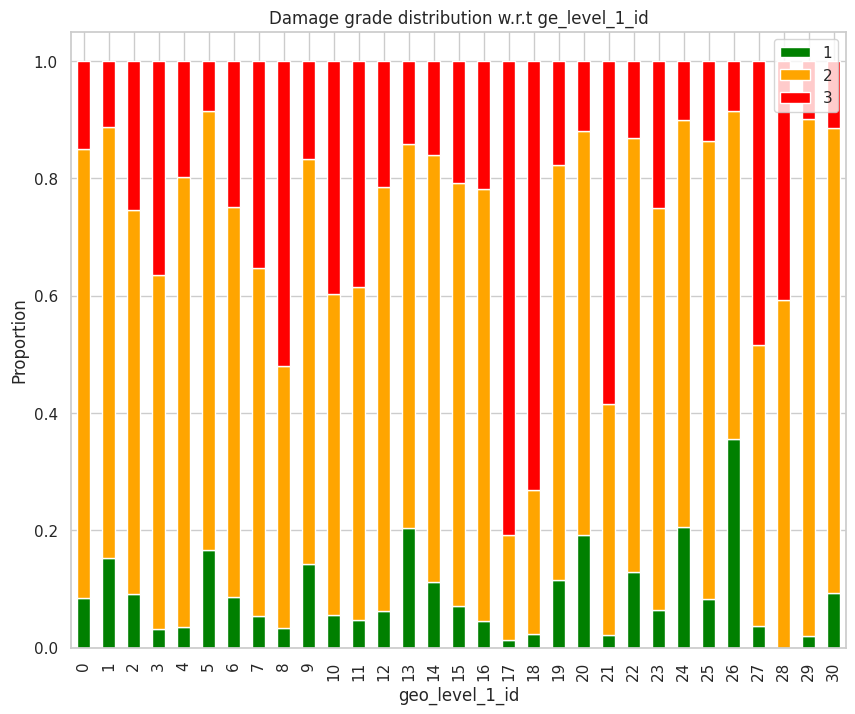

In [ ]:
geo_level_1_distr_df.plot.bar(stacked = True, figsize = (10,8), color = ["green","orange", "red"])
plt.ylabel("Proportion")
plt.title("Damage grade distribution w.r.t ge_level_1_id")
plt.show()

Here we see that all the regions from 0 to 30 have been considerably impacted by the earthquake because most of the buildings
in every zone are assigned a damage grade greater than 1
Here i notice that more than 70% of the buildings in zone 17 and 18 have experienced a very high damage from the earthquake (damage_grade = 3)
The safest zone is the zone 26 where more than 30 percent of the buildings have had a damage grade of 1.

In [ ]:
def cramers_v(ser1,ser2):
    cross_tabular = pd.crosstab(ser1, ser2)
    chi_statistics= scs.chi2_contingency(cross_tabular)
    test_statistic = chi_statistics[0]
    nr_of_data = cross_tabular.sum().sum()
    row,col = cross_tabular.shape
    min_dim = min(row,col)
    phi = test_statistic/nr_of_data
    cramers_v = np.sqrt(phi/(min_dim-1))
    return cramers_v

In [ ]:
def cramers_v_bias_corrected(ser1,ser2):
    cross_tabular = pd.crosstab(ser1, ser2)
    chi_statistics= scs.chi2_contingency(cross_tabular)
    test_statistic = chi_statistics[0]
    nr_of_data = cross_tabular.sum().sum()
    row,col = cross_tabular.shape
    phi = test_statistic/nr_of_data
    phi2corr = max(0,phi-((row-1)*(col-1))/(nr_of_data-1))
    rowcorr = row - ((row-1)**2)/(nr_of_data-1)
    colcorr = col - ((col-1)**2)/(nr_of_data-1)
    cramers_v = np.sqrt(phi2corr/min(rowcorr-1,colcorr-1))
    return cramers_v

In [ ]:
df = pd.DataFrame(index = categorical_incl_binary_df.columns)
for feature in categorical_incl_binary_df.columns:
    cramers_values = []
    for second_feature in categorical_incl_binary_df.columns:
        cramers_value = cramers_v(categorical_incl_binary_df[feature],categorical_incl_binary_df[second_feature])
        cramers_values.append(cramers_value)
    
    
    
    df[feature] = cramers_values

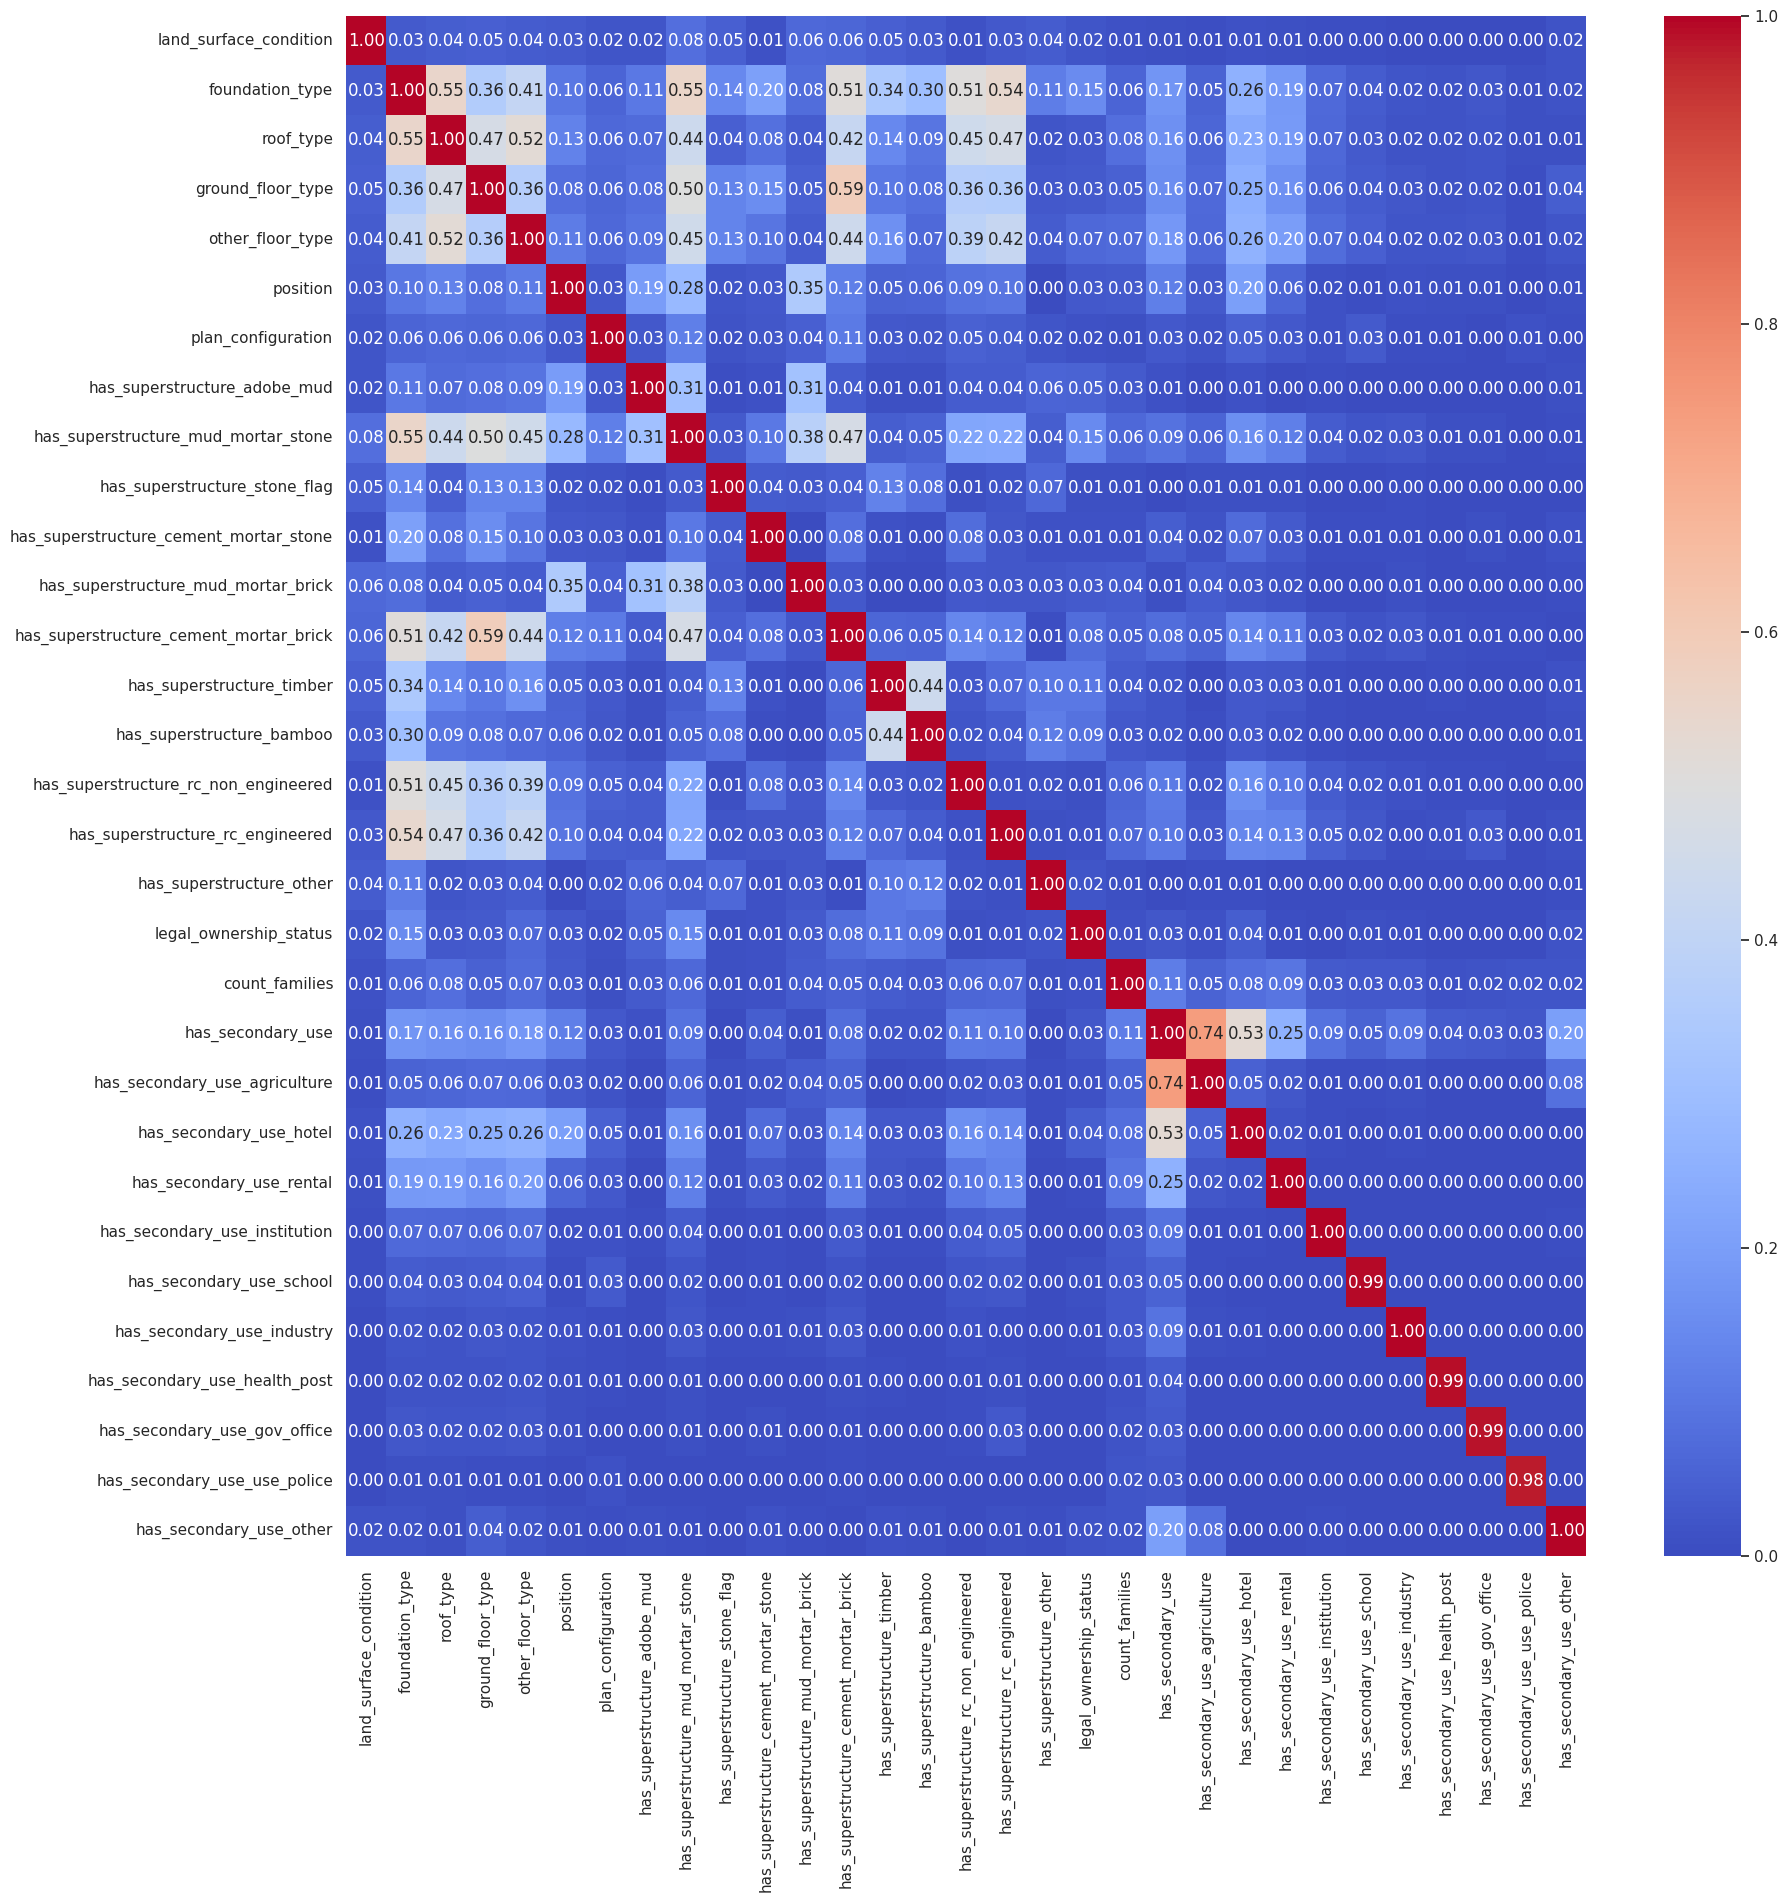

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df,cmap="coolwarm",annot = True, fmt= '.2f')
plt.show()

In [ ]:
secondary_usage_df = categorical_incl_binary_df.loc[:,"has_secondary_use_agriculture":"has_secondary_use_other"]


In [ ]:
#checking if has_secondary_use is redundnt by reconstructing it from other has_secondary_use columns
max_row_values = []

In [ ]:
for row in secondary_usage_df.index:
    max_row_values.append(max(secondary_usage_df.loc[row]))
    
max_row_values_ser = pd.Series(max_row_values)

In [ ]:
print(max_row_values_ser.equals(full_df["has_secondary_use"]))

True


Therefore the column has_secondary_use is redundant
